In [29]:
import pandas as pd
import MyAnalysisApi as myapi

myapi.setup_env()

In [30]:
df_train  = pd.read_csv("dataset/merged/train_merged.csv")
df_test = pd.read_csv("dataset/merged/test_merged.csv")

## Inserting the day,month,week and year columns

In [31]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    421570 non-null  int64  
 1   Store         421570 non-null  int64  
 2   Dept          421570 non-null  int64  
 3   Date          421570 non-null  object 
 4   Weekly_Sales  421570 non-null  float64
 5   IsHoliday     421570 non-null  bool   
 6   Type          421570 non-null  object 
 7   Size          421570 non-null  int64  
 8   Temperature   421570 non-null  float64
 9   Fuel_Price    421570 non-null  float64
 10  MarkDown1     150681 non-null  float64
 11  MarkDown2     111248 non-null  float64
 12  MarkDown3     137091 non-null  float64
 13  MarkDown4     134967 non-null  float64
 14  MarkDown5     151432 non-null  float64
 15  CPI           421570 non-null  float64
 16  Unemployment  421570 non-null  float64
dtypes: bool(1), float64(10), int64(4), object(2)
mem

In [32]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    115064 non-null  int64  
 1   Store         115064 non-null  int64  
 2   Dept          115064 non-null  int64  
 3   Date          115064 non-null  object 
 4   IsHoliday     115064 non-null  bool   
 5   Type          115064 non-null  object 
 6   Size          115064 non-null  int64  
 7   Temperature   115064 non-null  float64
 8   Fuel_Price    115064 non-null  float64
 9   MarkDown1     114915 non-null  float64
 10  MarkDown2     86437 non-null   float64
 11  MarkDown3     105235 non-null  float64
 12  MarkDown4     102176 non-null  float64
 13  MarkDown5     115064 non-null  float64
 14  CPI           76902 non-null   float64
 15  Unemployment  76902 non-null   float64
dtypes: bool(1), float64(9), int64(4), object(2)
memory usage: 13.3+ MB


#Cibvertubg
We need convert  the datecolumn  to timestamp

In [33]:
df_train['Date'] = pd.to_datetime(df_train['Date'],format="%Y-%m-%d")
df_test['Date'] = pd.to_datetime(df_test['Date'],format="%Y-%m-%d")

### Adding day,month, week and year column

In [34]:
#Adding to train dataset
df_train['Day'] = df_train['Date'].dt.day
df_train['Month'] = df_train['Date'].dt.month
df_train['Year'] = df_train['Date'].dt.year
df_train['Week'] = df_train['Date'].dt.week

C:\Users\lucas\AppData\Local\Temp/ipykernel_21728/4059504541.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df_train['Week'] = df_train['Date'].dt.week


In [35]:
#Adding to test dataset
df_test['Day'] = df_test['Date'].dt.day
df_test['Month'] = df_test['Date'].dt.month
df_test['Year'] = df_test['Date'].dt.year
df_test['Week'] = df_test['Date'].dt.week

C:\Users\lucas\AppData\Local\Temp/ipykernel_21728/519188192.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df_test['Week'] = df_test['Date'].dt.week


## Converting Temperature to Celsius

In [36]:
df_train["Temperature"] = df_train["Temperature"].apply(lambda fahrenheit: (fahrenheit  - 32) *5 / 9 )
df_test["Temperature"] = df_test["Temperature"].apply(lambda fahrenheit: (fahrenheit  - 32)* 5 / 9 )


import matplotlib.pyplot as plt

<AxesSubplot:ylabel='Density'>

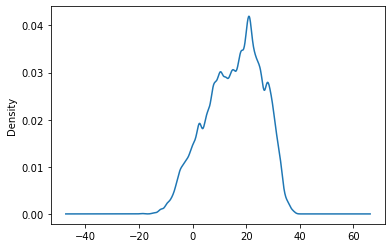

In [37]:
fig = plt.figure()
fig.set_facecolor("white")
df_train["Temperature"].plot.density()

In [38]:
df_train

,Unnamed: 0,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,...,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Day,Month,Year,Week
0,0,1,1,2010-02-05,24924.50,False,A,151315,5.727778,2.572,...,NaN,NaN,NaN,NaN,211.096358,8.106,5,2,2010,5
1,1,1,2,2010-02-05,50605.27,False,A,151315,5.727778,2.572,...,NaN,NaN,NaN,NaN,211.096358,8.106,5,2,2010,5
2,2,1,3,2010-02-05,13740.12,False,A,151315,5.727778,2.572,...,NaN,NaN,NaN,NaN,211.096358,8.106,5,2,2010,5
3,3,1,4,2010-02-05,39954.04,False,A,151315,5.727778,2.572,...,NaN,NaN,NaN,NaN,211.096358,8.106,5,2,2010,5
4,4,1,5,2010-02-05,32229.38,False,A,151315,5.727778,2.572,...,NaN,NaN,NaN,NaN,211.096358,8.106,5,2,2010,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,421565,45,93,2012-10-26,2487.80,False,B,118221,14.916667,3.882,...,58.08,100.0,211.94,858.33,192.308899,8.667,26,10,2012,43
421566,421566,45,94,2012-10-26,5203.31,False,B,118221,14.916667,3.882,...,58.08,100.0,211.94,858.33,192.308899,8.667,26,10,2012,43
421567,421567,45,95,2012-10-26,56017.47,False,B,118221,14.916667,3.882,...,58.08,100.0,211.94,858.33,192.308899,8.667,26,10,2012,43
421568,421568,45,97,2012-10-26,6817.48,False,B,118221,14.916667,3.882,...,58.08,100.0,211.94,858.33,192.308899,8.667,26,10,2012,43


# Saving Data

In [ ]:
df_train.to_csv("dataset/transformed/train_transformed.csv")
df_test.to_csv("dataset/transformed/test_transformed.csv")